In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [3]:
#reading data and sepreating the dependant and independant variable
dataset = pd.read_csv('trainf.csv')
z_scores = stats.zscore(dataset)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
dataset = dataset.drop(outlier_indices)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
print('Shape of input dataset is ', X.shape)
print ('Shape of output dataset is ', Y.shape)
#spiliting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=0)
print('Training dataset size is ', X_train.shape)
print('Testing dataset size is  ', X_test.shape)

Shape of input dataset is  (846, 13)
Shape of output dataset is  (846,)
Training dataset size is  (676, 13)
Testing dataset size is   (170, 13)


In [4]:
print(outlier_indices)

[  4   5  13  14  16  17  22  23  39  40  90  90  95 100 105 110 115 123
 124 125 126 133 134 135 136 143 144 145 146 162 163 165 166 171 172 180
 181 205 215 223 247 252 257 262 285 299 300 308 309 317 318 326 327 330
 331 393 398 403 408 413 413 418 423 428 433 438 443 448 451 453 457 458
 466 467 468 469 476 477 478 479 486 487 488 489 496 497 498 499 506 507
 508 509 516 517 518 519 534 549 550 551 563 564 613 614 663 664 684 713
 763 764 788 813 814 884 938]


In [5]:
dataset.describe()

,Angle,Length,Ht_E,UW_E,Ht_SS,Void Ratio,UW_SS,Lamda,Kappa,PR,FA,OCR,Permeability,After 30d
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,2.439716,7.269504,5.014184,19.524823,5.516548,1.957208,16.291596,0.385935,0.046301,0.317423,5.790366,1.530615,8.885625,90.527187
std,0.752452,1.770419,0.772171,0.760706,2.135989,0.693705,1.062427,0.238211,0.025785,0.021189,1.559095,0.633546,0.825796,61.228400
min,1.000000,6.000000,4.000000,18.000000,2.000000,0.500000,12.650000,0.042500,0.010000,0.210000,1.500000,1.000000,6.698970,13.000000
25%,2.000000,6.000000,4.000000,19.000000,4.000000,1.600000,16.000000,0.210000,0.026000,0.300000,5.000000,1.100000,8.221849,50.000000
50%,3.000000,6.000000,5.000000,20.000000,5.000000,1.810000,16.500000,0.330000,0.041000,0.320000,5.000000,1.400000,9.000000,73.500000
75%,3.000000,10.000000,6.000000,20.000000,7.000000,2.450000,16.500000,0.520000,0.065000,0.320000,6.500000,1.600000,9.698970,110.000000
max,3.000000,10.000000,6.000000,20.000000,9.000000,3.300000,20.000000,1.090000,0.123000,0.370000,10.500000,4.500000,10.397940,362.000000


LR training phase MAE, MSE, RMSE, r2 score is  20.935676287378858 994.3757295679834 31.53372368699871 0.7259528711019514
LR testing phase MAE, MSE, RMSE, r2 score is  23.331816695971977 1176.7440280925232 34.30370283355025 0.7199342053340126
R-squared: 0.7199342053340126
Adjusted R-squared: 0.696595389111847


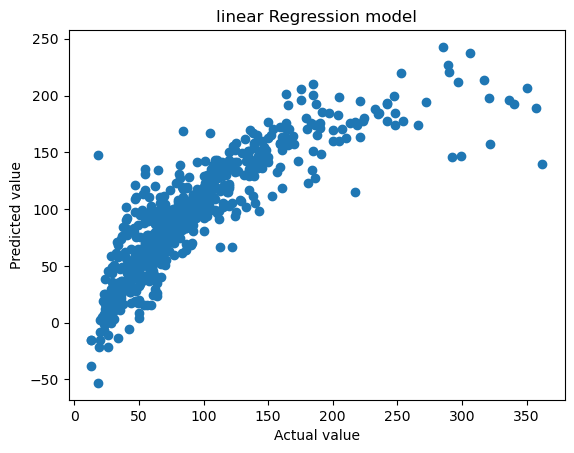

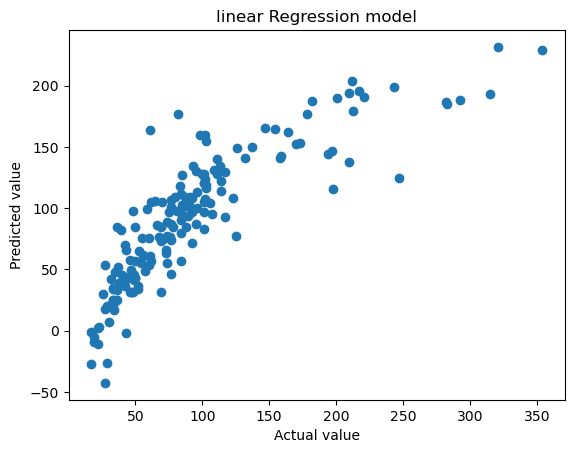

In [6]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train, Y_train)
Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
r2_score_train = r2_score(Y_train,Y_predict_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('LR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("linear Regression model")
print('LR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("linear Regression model")
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))

print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

In [7]:
reg.intercept_

-100.29436784894314

PR training phase MAE, MSE, RMSE, RMLSE, r2 score is  11.679878189718934 342.871082932286 18.516778416676214 0.9055057026577058
PR testing phase MAE, MSE, RMSE, r2 score is  15.011339613970588 676.6131665622487 26.011788991959946 0.8389656546786173
R-squared: 0.8389656546786173
Adjusted R-squared: 0.8255461259018354


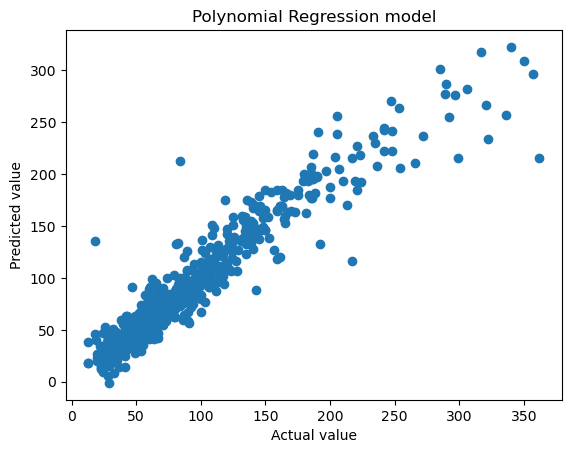

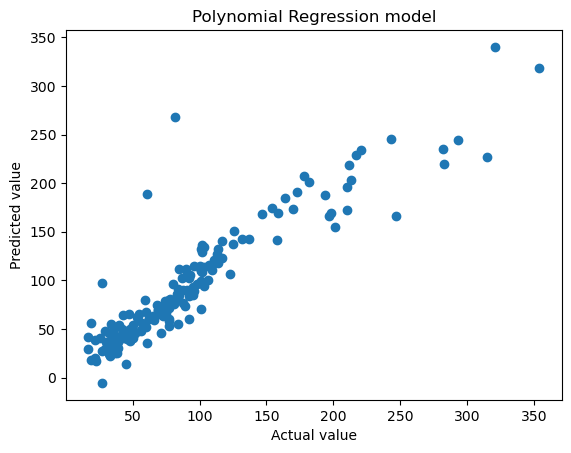

In [9]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
poly=PolynomialFeatures(degree=2)
X_poly= poly.fit_transform(X_train)
poly.fit(X_poly, Y_train)
reg_poly=LinearRegression()
reg_poly.fit(X_poly, Y_train)

Y_predict_train=reg_poly.predict(poly.fit_transform(X_train))
Y_predict_test=reg_poly.predict(poly.fit_transform(X_test))

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)
r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('PR training phase MAE, MSE, RMSE, RMLSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Polynomial Regression model")
print('PR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Polynomial Regression model")
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))

print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

SVR training phase MAE, MSE, RMSE, r2 score is  30.22088069513561 2449.930014897097 49.49676772171186 0.32480624112235945
SVR testing phase MAE, MSE, RMSE, r2 score is  33.1219894498378 3008.3140401810047 54.8480996952584 0.284019428053647
R-squared: 0.284019428053647
Adjusted R-squared: 0.22435438039145095


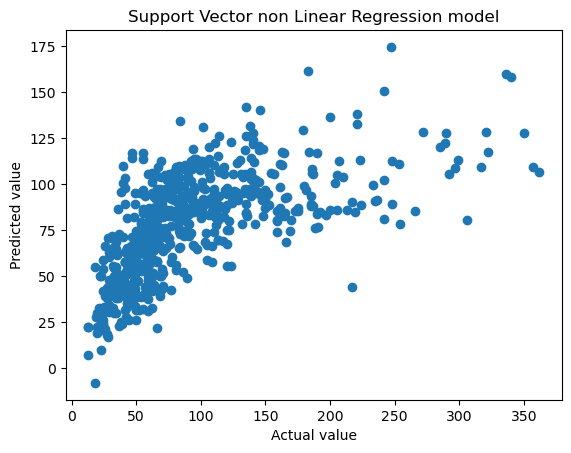

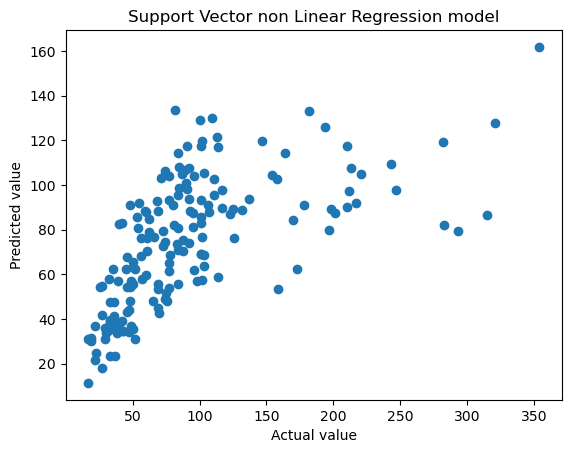

In [10]:
#support vector linear regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
reg=SVR(kernel='linear')
reg.fit(X_train, Y_train)

Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)
r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('SVR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")
print('SVR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))

print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

SVR training phase MAE, MSE, RMSE, RMLSE, r2 score is  11.862522083760728 742.8324074616264 27.254951980541563 0.7952774967609803
SVR testing phase MAE, MSE, RMSE, r2 score is  19.87334531739532 1475.643832508292 38.41410981017642 0.6487958700199977
R-squared: 0.6487958700199977
Adjusted R-squared: 0.6195288591883308


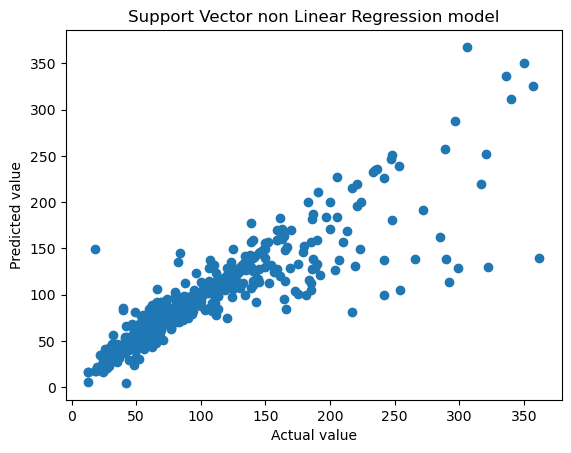

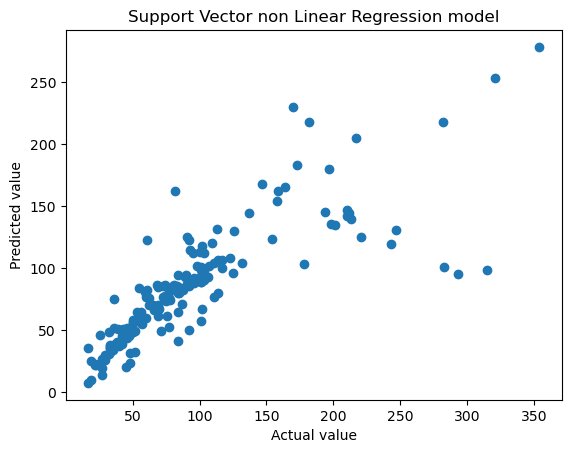

In [11]:
#support vector non linear regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
reg=SVR(kernel='poly', degree=16)
reg.fit(X_train, Y_train)

Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)

r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('SVR training phase MAE, MSE, RMSE, RMLSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")
print('SVR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))

print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

Shape of input dataset is  (847, 13)
Shape of output dataset is  (847,)
Training dataset size is  (635, 13)
Testing dataset size is   (212, 13)
DTR training phase MAE, MSE, RMSE, r2 score is  24.69787901512311 1417.8356655418074 37.65415867526198 0.8061755764662033
DTR testing phase MAE, MSE, RMSE, r2 score is  33.040148622342016 2375.772465583062 48.74189640938339 0.6099441704997576
212
13
R-squared: 0.6099441704997576
Adjusted R-squared: 0.5843344443204488


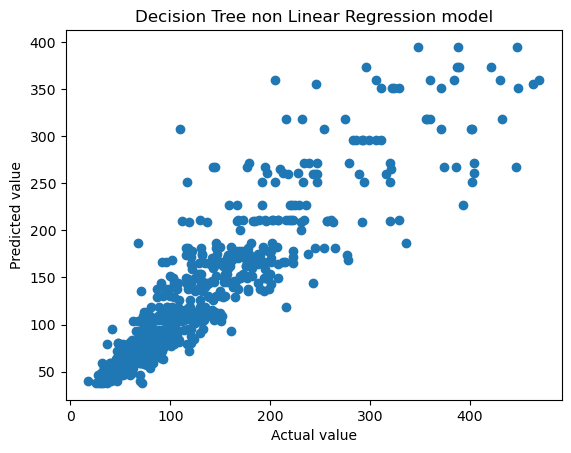

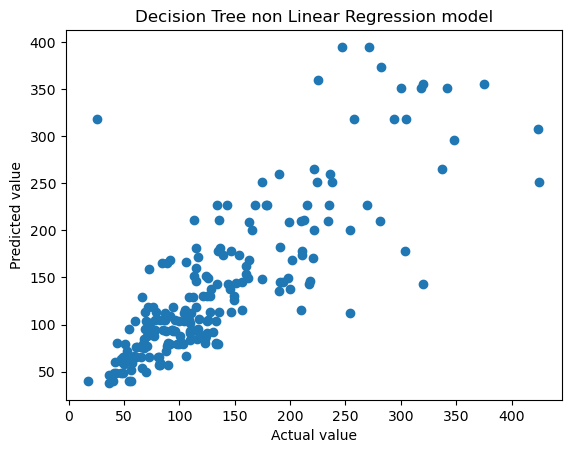

In [18]:
#Decesion tree non linear regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
dataset = pd.read_csv('trainfy.csv')
z_scores = stats.zscore(dataset)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
dataset = dataset.drop(outlier_indices)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
print('Shape of input dataset is ', X.shape)
print ('Shape of output dataset is ', Y.shape)
#spiliting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
print('Training dataset size is ', X_train.shape)
print('Testing dataset size is  ', X_test.shape)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 3, 5, 7],  # Adjust these values as needed
    'min_samples_split': [2, 5, 10],  # Adjust these values as needed
    'min_samples_leaf': [1, 2, 4],  # Adjust these values as needed
    'max_features': [1]  # Adjust these values as needed
}

# Create the decision tree regressor
reg = DecisionTreeRegressor(random_state=1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, Y_train)

# Get the best estimator from the grid search
best_reg = grid_search.best_estimator_

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_reg, X_train, Y_train, cv=5, scoring='r2')

# Fit the model on the entire training data
best_reg.fit(X_train, Y_train)

# Make predictions
Y_predict_train = best_reg.predict(X_train)
Y_predict_test = best_reg.predict(X_test)


mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)

r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)

r2_score_test = r2_score(Y_test,Y_predict_test)
print('DTR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Decision Tree non Linear Regression model")
print('DTR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Decision Tree non Linear Regression model")
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))
print(n)
print(p)
print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

Shape of input dataset is  (846, 13)
Shape of output dataset is  (846,)
Training dataset size is  (634, 13)
Testing dataset size is   (212, 13)
RFR training phase MAE, MSE, RMSE, r2 score is  5.337944269190326 100.73281737223977 10.03657398579016 0.972031459119758
RFR testing phase MAE, MSE, r2 score is  15.216223270440251 897.6187851320753 29.96028679989688 0.7845582352654836
R-squared: 0.7845582352654836
Adjusted R-squared: 0.7704130688940255


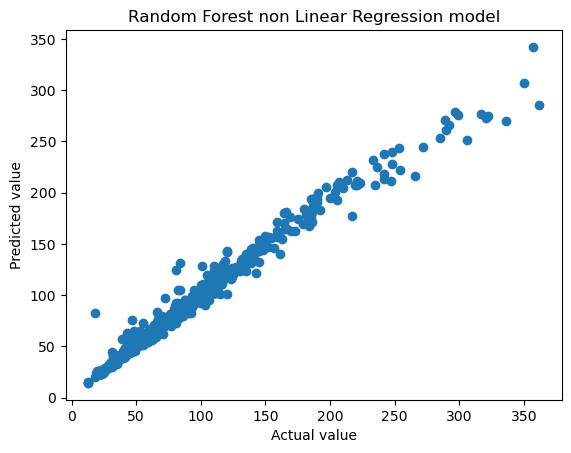

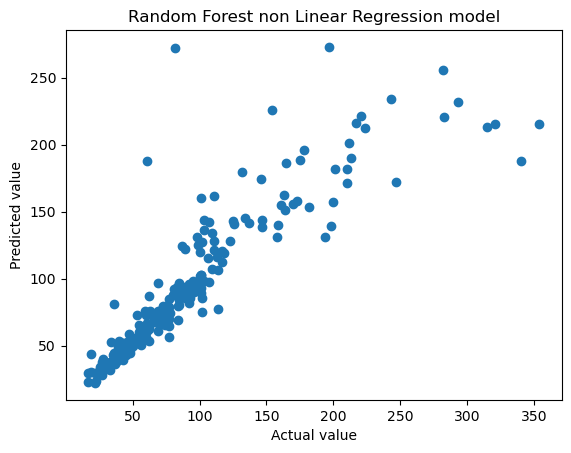

In [16]:
#Random Forest non linear regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
dataset = pd.read_csv('trainf.csv')
z_scores = stats.zscore(dataset)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
dataset = dataset.drop(outlier_indices)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
print('Shape of input dataset is ', X.shape)
print ('Shape of output dataset is ', Y.shape)
#spiliting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
print('Training dataset size is ', X_train.shape)
print('Testing dataset size is  ', X_test.shape)
reg=RandomForestRegressor(n_estimators=50, random_state=1)
reg.fit(X_train, Y_train)

Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)
r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)

r2_score_test = r2_score(Y_test,Y_predict_test)
print('RFR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Random Forest non Linear Regression model")
print('RFR testing phase MAE, MSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Random Forest non Linear Regression model")
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))

print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

ANN training phase MAE, MSE, RMSE, R2 score: 28.14053548555914 1781.3288489291713 42.205791651492234 0.7564844462169178
ANN testing phase MAE, MSE, RMSE, R2 score: 32.555087082541306 2234.696877250419 47.27258060705401 0.6331060500258843


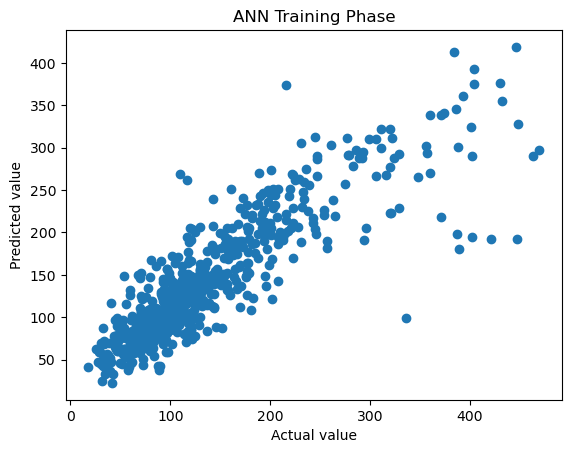

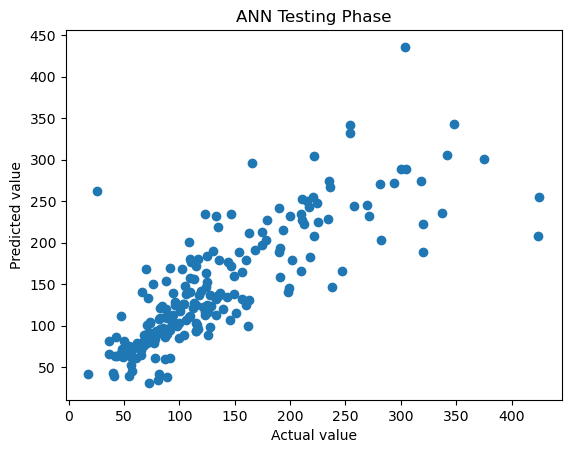

R-squared: 0.6331060500258843
Adjusted R-squared: 0.609017053310412


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, Y_train)

# Predict on training and testing data
Y_predict_train = model.predict(X_train)
Y_predict_test = model.predict(X_test)

# Calculate evaluation metrics for training data
mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = np.sqrt(mse_train)
r2_score_train = r2_score(Y_train, Y_predict_train)

# Calculate evaluation metrics for testing data
mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = np.sqrt(mse_test)
r2_score_test = r2_score(Y_test, Y_predict_test)

# Print evaluation metrics for training data
print('ANN training phase MAE, MSE, RMSE, R2 score:', mae_train, mse_train, rmse_train, r2_score_train)

# Plot actual vs predicted values for training data
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('ANN Training Phase')

# Print evaluation metrics for testing data
print('ANN testing phase MAE, MSE, RMSE, R2 score:', mae_test, mse_test, rmse_test, r2_score_test)

# Plot actual vs predicted values for testing data
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('ANN Testing Phase')

# Show the plots
plt.show()
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))

print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

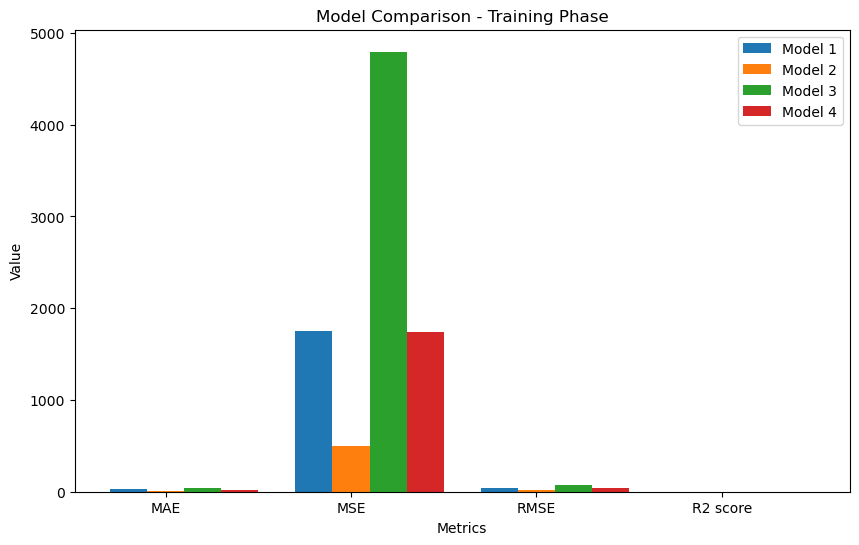

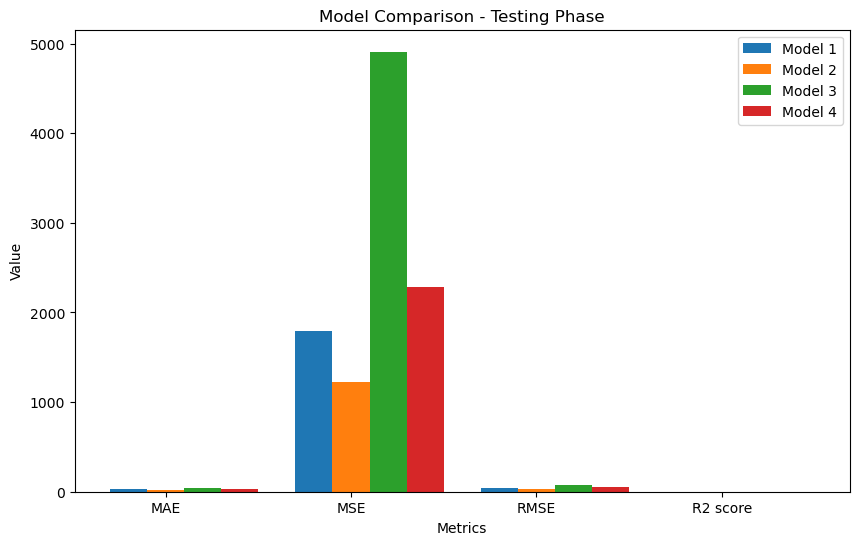

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Metrics for linear regression (LR)
# lr_training = [29.09, 1747.17, 41.80, 0.76]
# lr_testing = [27.78, 1797.32, 42.39, 0.72]

# # Metrics for polynomial regression (PR)
# pr_training = [13.08, 493.18, 22.21, 0.93]
# pr_testing = [18.58, 1219.27, 34.92, 0.81]

# # Metrics for support vector regression (SVR)
# svr_training = [44.02, 4794.58, 69.24, 0.28]
# svr_testing = [44.32, 4909.00, 70.06, 0.26]

# # Metrics for support vector regression with polynomial kernel (SVR)
# svr_poly_training = [19.28, 1742.30, 41.74, 0.76]
# svr_poly_testing = [24.90, 2285.67, 47.81, 0.65]

# # Create labels for the metrics
# labels = ['MAE', 'MSE', 'RMSE', 'R2 score']

# # Create arrays for training and testing metrics
# training_metrics = [lr_training, pr_training, svr_training, svr_poly_training]
# testing_metrics = [lr_testing, pr_testing, svr_testing, svr_poly_testing]

# # Plotting the bar graphs for training phase
# plt.figure(figsize=(10, 6))
# width = 0.2
# x = np.arange(len(labels))

# for i, metrics in enumerate(training_metrics):
#     plt.bar(x + (i * width), metrics, width=width, label='Model ' + str(i+1))

# plt.xlabel('Metrics')
# plt.ylabel('Value')
# plt.title('Model Comparison - Training Phase')
# plt.xticks(x + width, labels)
# plt.legend()
# plt.show()

# # Plotting the bar graphs for testing phase
# plt.figure(figsize=(10, 6))

# for i, metrics in enumerate(testing_metrics):
#     plt.bar(x + (i * width), metrics, width=width, label='Model ' + str(i+1))

# plt.xlabel('Metrics')
# plt.ylabel('Value')
# plt.title('Model Comparison - Testing Phase')
# plt.xticks(x + width, labels)
# plt.legend()
# plt.show()


In [ ]:
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense
# #adding_input_and_hidden_layer
# model=Sequential()

In [ ]:
# model.add(Dense(10, init='uniform', activation='relu', input_dim=5))